<a href="https://colab.research.google.com/github/Memento2121/SeaStateForcastDL/blob/main/Visualization_WindSpeedDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from datetime import datetime
from io import StringIO

# Load the dataset from GitHub (Updated with correct JSON file extension)
url = 'https://raw.githubusercontent.com/Memento2121/SeaStateForcastDL/main/m6_buoy_dataset.json'
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Load JSON data
    df = pd.DataFrame(data)  # Convert to DataFrame
else:
    print("Error: Unable to fetch data from GitHub")
    df = pd.DataFrame()  # Empty DataFrame in case of failure

# Display the first few rows of the dataframe
print("Initial DataFrame:")
print(df.head())

Initial DataFrame:
            time  wspd   wdir  t_air  p_air  rh_air  cloud  day  month_1  \
0  1704153600000  13.3  232.3   11.0  981.0    81.5   99.3    1     True   
1  1704157200000  12.0  237.3   11.5  980.4    77.8   98.9    1     True   
2  1704160800000  11.4  237.7   10.7  979.9    83.0   99.2    1     True   
3  1704164400000   9.9  236.2   10.8  979.1    79.2   97.8    1     True   
4  1704168000000  10.3  238.5   10.5  979.0    81.0   96.7    1     True   

   month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0    False    False    False    False    False    False    False    False   
1    False    False    False    False    False    False    False    False   
2    False    False    False    False    False    False    False    False   
3    False    False    False    False    False    False    False    False   
4    False    False    False    False    False    False    False    False   

   month_10  month_11  
0     False     False  
1     False  

In [28]:
# Convert the 'time' column from milliseconds since epoch to a readable datetime format
df['time'] = pd.to_datetime(df['time'], unit='ms')

# Rename the column for clarity
df.rename(columns={'time': 'timestamp'}, inplace=True)

# Replace boolean True/False in month columns with 1 and 0
month_columns = [col for col in df.columns if col.startswith('month_')]
df[month_columns] = df[month_columns].astype(int)

# Display the dataframe after preprocessing
print("\nDataFrame after preprocessing:")
print(df.head())



DataFrame after preprocessing:
            timestamp  wspd   wdir  t_air  p_air  rh_air  cloud  day  month_1  \
0 2024-01-02 00:00:00  13.3  232.3   11.0  981.0    81.5   99.3    1        1   
1 2024-01-02 01:00:00  12.0  237.3   11.5  980.4    77.8   98.9    1        1   
2 2024-01-02 02:00:00  11.4  237.7   10.7  979.9    83.0   99.2    1        1   
3 2024-01-02 03:00:00   9.9  236.2   10.8  979.1    79.2   97.8    1        1   
4 2024-01-02 04:00:00  10.3  238.5   10.5  979.0    81.0   96.7    1        1   

   month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   month_10  month

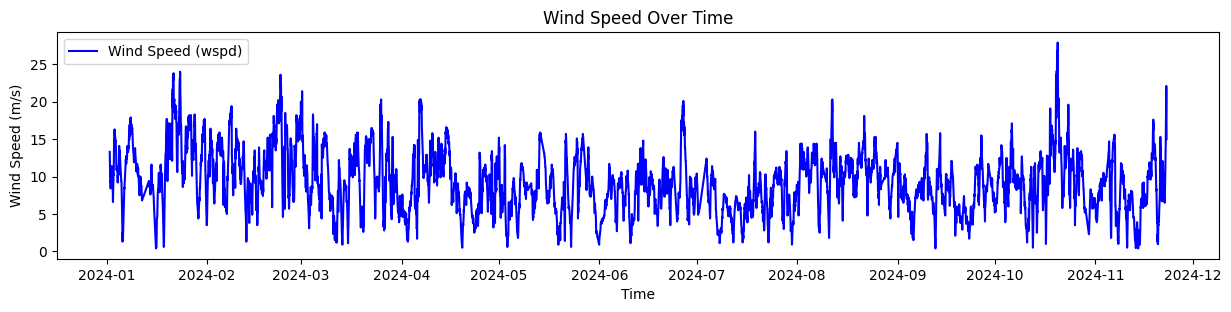

In [29]:
# Set the 'timestamp' as the index for time-series analysis
df.set_index('timestamp', inplace=True)

# Plotting
plt.figure(figsize=(15, 10))

# Plot wind speed over time
plt.subplot(3, 1, 1)
plt.plot(df.index, df['wspd'], label='Wind Speed (wspd)', color='b')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed Over Time')
plt.legend()


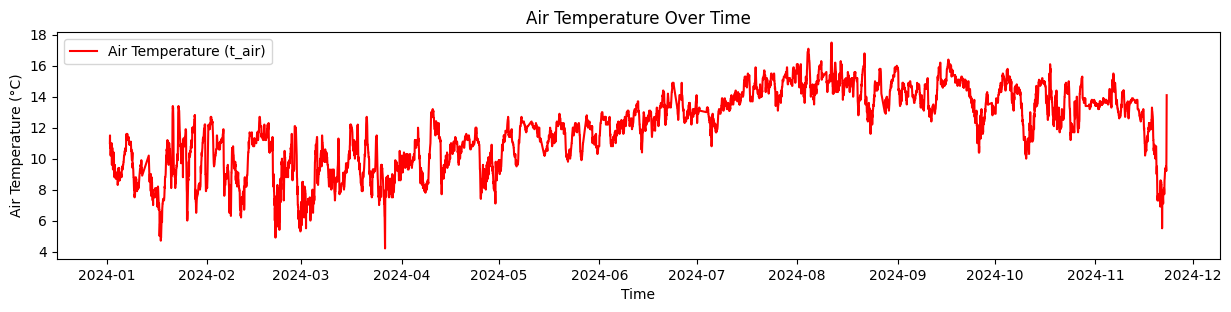

In [30]:
# Plotting
plt.figure(figsize=(15, 10))

# Plot air temperature over time
plt.subplot(3, 1, 2)
plt.plot(df.index, df['t_air'], label='Air Temperature (t_air)', color='r')
plt.xlabel('Time')
plt.ylabel('Air Temperature (°C)')
plt.title('Air Temperature Over Time')
plt.legend()

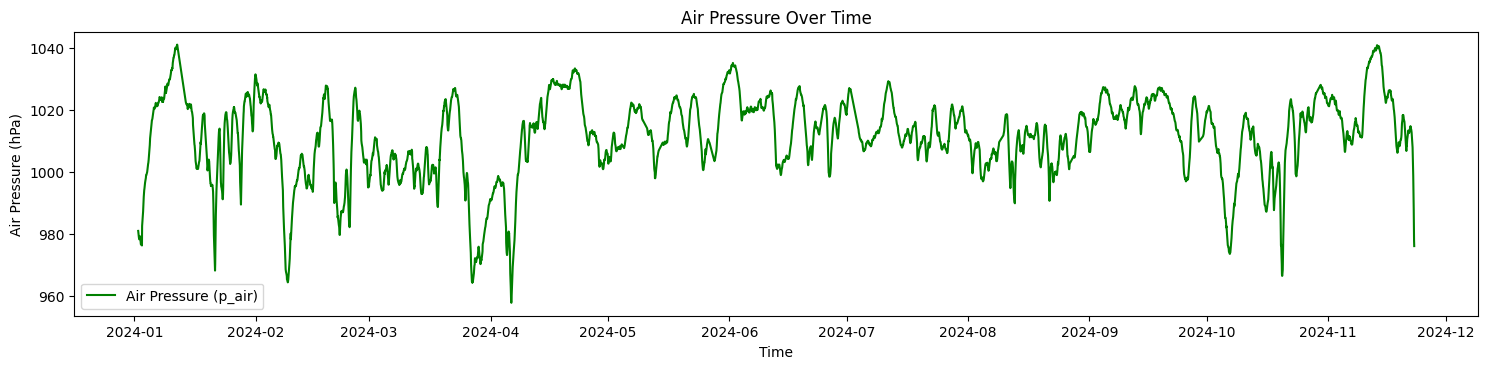

In [31]:
# Plotting
plt.figure(figsize=(15, 10))

# Plot air pressure over time
plt.subplot(3, 1, 3)
plt.plot(df.index, df['p_air'], label='Air Pressure (p_air)', color='g')
plt.xlabel('Time')
plt.ylabel('Air Pressure (hPa)')
plt.title('Air Pressure Over Time')
plt.legend()

plt.tight_layout()
plt.show()

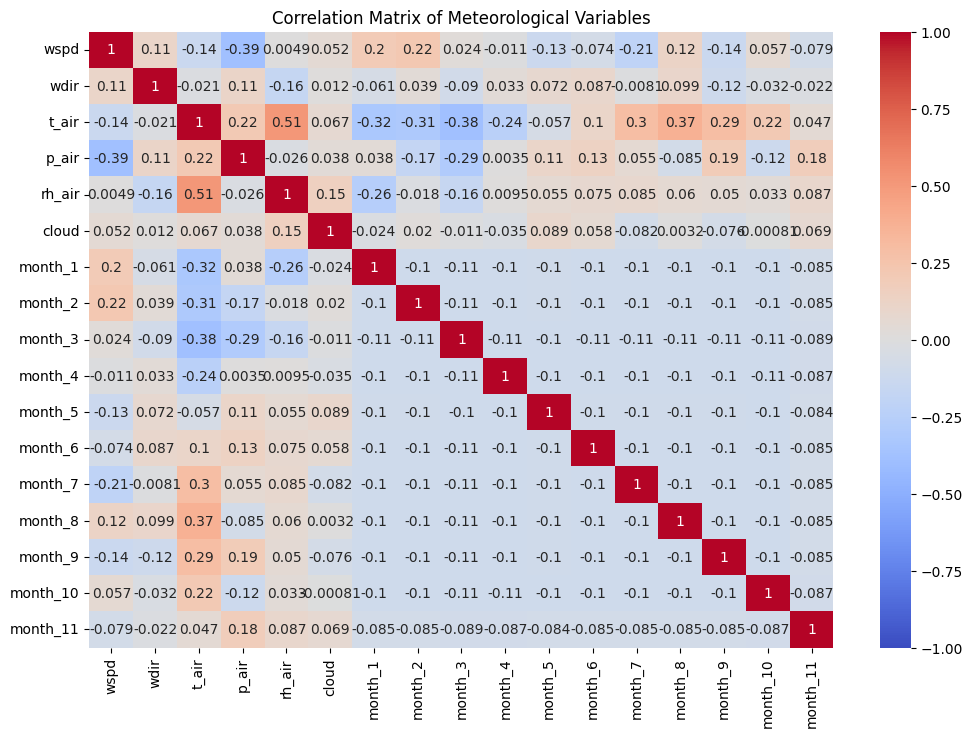

In [32]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df[['wspd', 'wdir', 't_air', 'p_air', 'rh_air', 'cloud']+month_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Meteorological Variables')
plt.show()

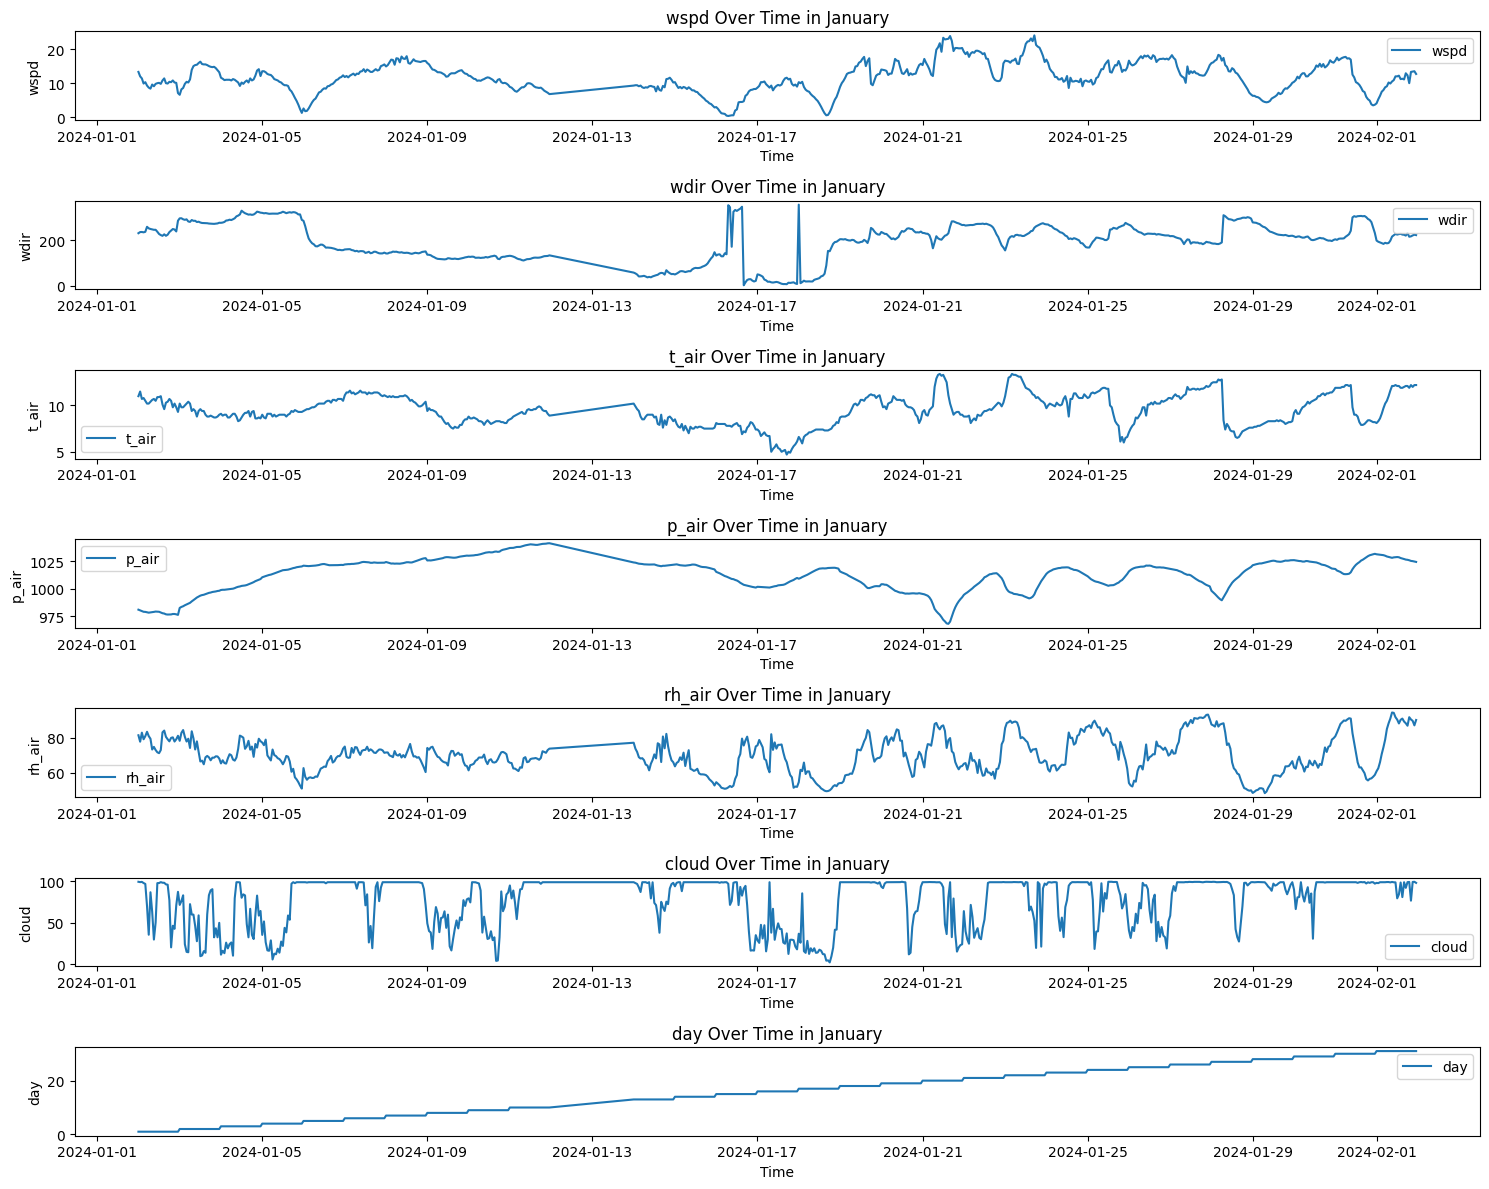

In [33]:
# Select data only for January (month_1 == 1)
df_january = df[df['month_1'] == 1]

# Drop month columns since we already filtered for January
df_january = df_january.drop(columns=month_columns)

# Plot all numerical variables for January
plt.figure(figsize=(15, 12))

for i, column in enumerate(df_january.columns):
    plt.subplot(len(df_january.columns), 1, i+1)
    plt.plot(df_january.index, df_january[column], label=column)
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.title(f"{column} Over Time in January")
    plt.legend()

plt.tight_layout()
plt.show()

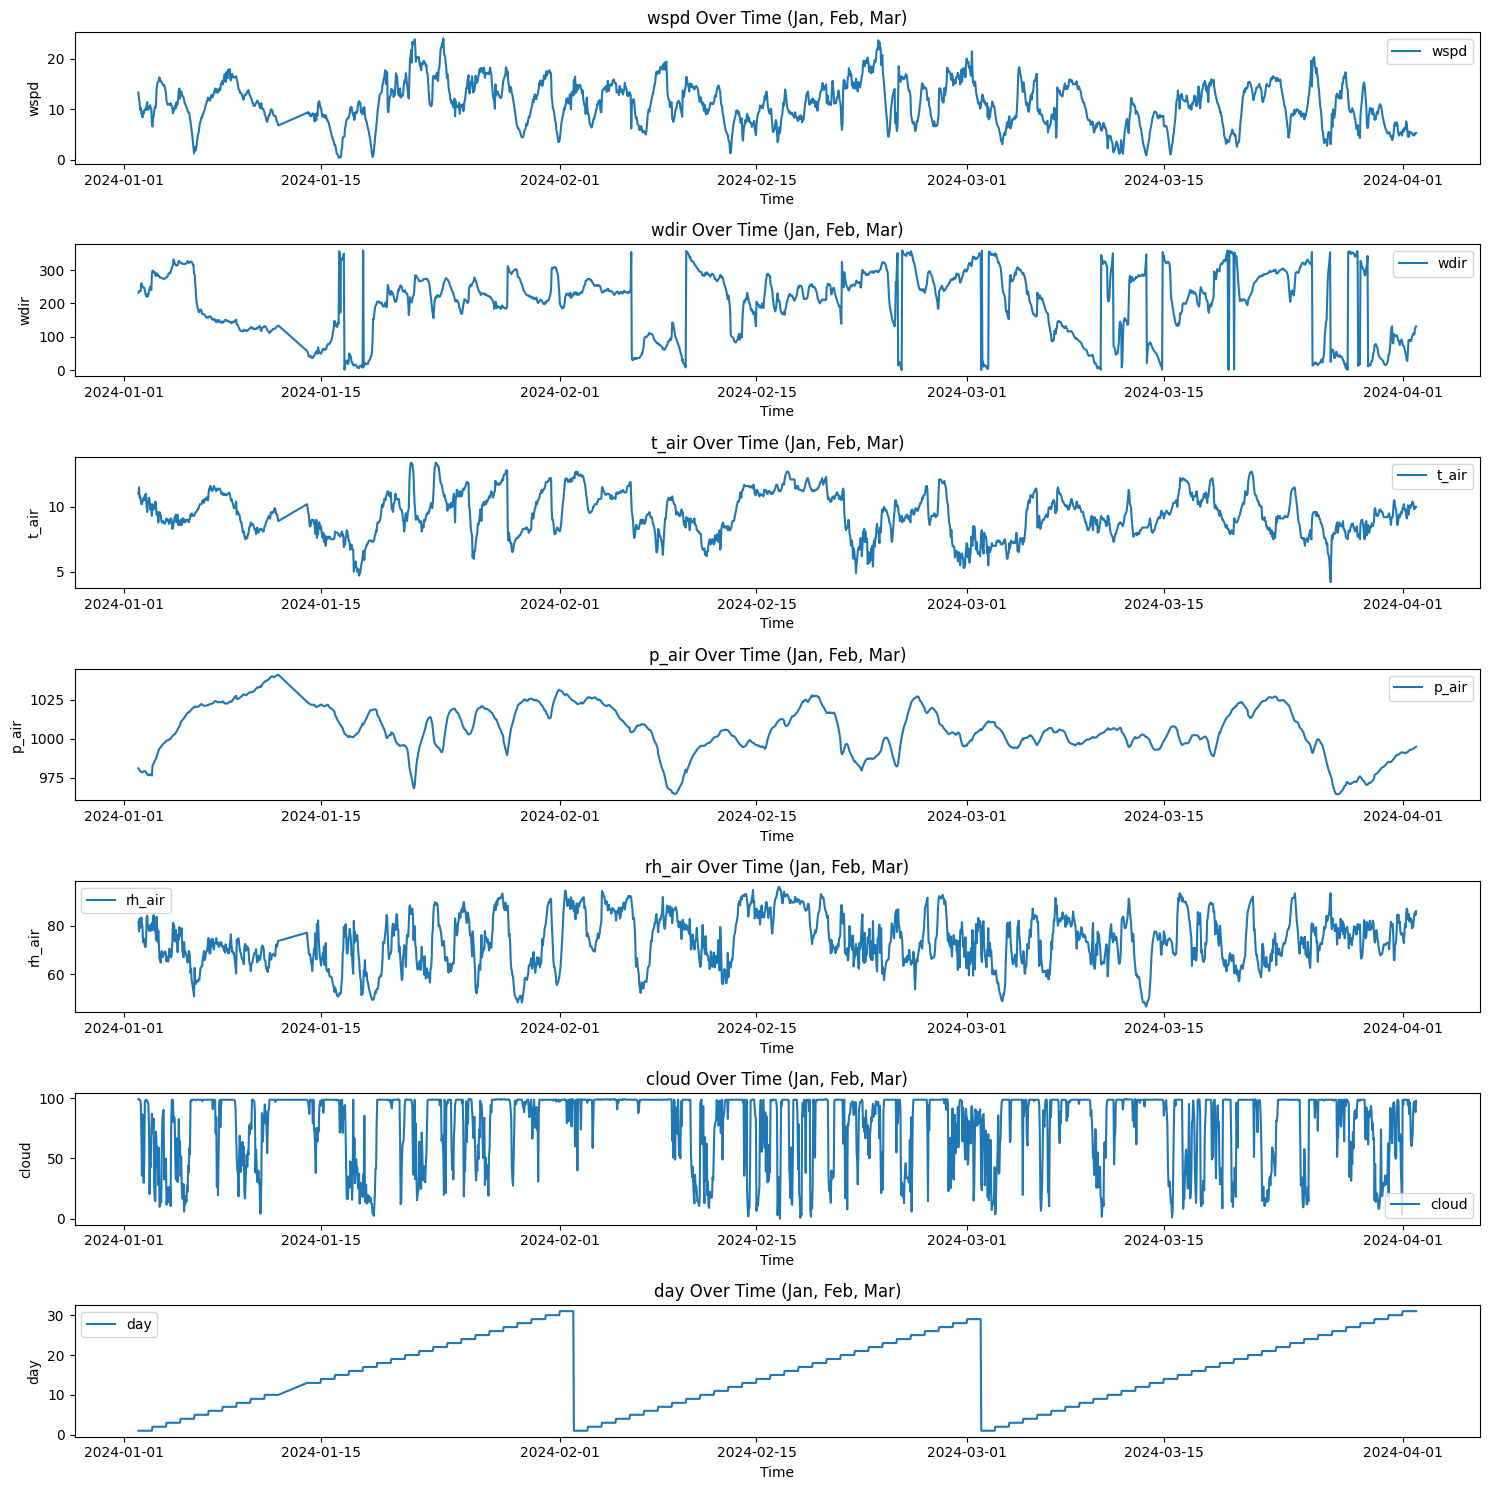

In [34]:
# Select data for January, February, and March
df_selected = df[(df['month_1'] == 1) | (df['month_2'] == 1) | (df['month_3'] == 1)]

# Drop month columns since we already filtered the required months
df_selected = df_selected.drop(columns=month_columns)

# Plot all numerical variables for January, February, and March
plt.figure(figsize=(15, 15))

for i, column in enumerate(df_selected.columns):
    plt.subplot(len(df_selected.columns), 1, i+1)
    plt.plot(df_selected.index, df_selected[column], label=column)
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.title(f"{column} Over Time (Jan, Feb, Mar)")
    plt.legend()

plt.tight_layout()
plt.show()